In [30]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
%matplotlib inline
%pylab inline
%config InlineBackend.figure_format = 'svg'

Populating the interactive namespace from numpy and matplotlib


D:\Anaconda\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['test', 'var']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [31]:
train = pd.read_csv ('train.csv')

In [32]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [33]:
test = pd.read_csv ('test.csv')

In [34]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [35]:
#Sale_Price=train.iloc[:,80]
#Sale_Price.shape

In [36]:
df1 = pd.read_csv('data_description.txt', delimiter = "\n")

In [37]:
y_train = train.SalePrice

In [38]:
train.drop('SalePrice', axis = 1, inplace = True)

In [39]:
train.columns == test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [40]:
train['is_test'] = 0
test['is_test'] = 1

In [41]:
df = pd.concat([train, test])

In [42]:
df.drop('Id', axis = 1, inplace = True)

In [43]:
df.shape

(2919, 80)

###### Amount of Null values

In [44]:
total_null = df.isnull().sum().sort_values(ascending=False) #First sum and order all null values for each variable
percentage = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False) #Get the percentage
missing_data = pd.concat([total_null, percentage], axis=1, keys=['Total', 'Percentage'])
missing_data.head(20)

,Total,Percentage
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageFinish,159,0.054471
GarageQual,159,0.054471
GarageCond,159,0.054471
GarageYrBlt,159,0.054471


In [45]:
df = df.drop((missing_data[missing_data["Percentage"] > 0.05]).index,1) #Drop All Var. with null values > 1

df.isnull().sum()

MSSubClass       0
MSZoning         4
LotArea          0
Street           0
LotShape         0
                ..
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
is_test          0
Length: 69, dtype: int64

In [46]:
num_col=df._get_numeric_data().columns.tolist()
num_col

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'is_test']

In [47]:
cat_col=set(df.columns)-set(num_col)
cat_col

{'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Foundation',
 'Functional',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSZoning',
 'MasVnrType',
 'Neighborhood',
 'PavedDrive',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'Street',
 'Utilities'}

In [48]:
for col in num_col:
    df[col].fillna(df[col].mean(),inplace=True)

In [49]:
for col in cat_col:

    df[col].fillna(df[col].mode()[0],inplace=True)

for i in cat_col:
    print(df[i].value_counts())

In [50]:
train_data = pd.read_csv ('train.csv')

###### Corr matrix

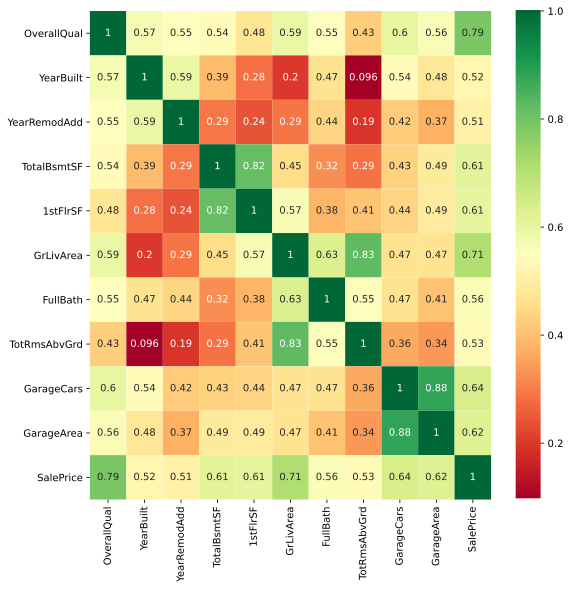

In [52]:
corrmat = train_data.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(9,9))
g = sns.heatmap(train_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [53]:
var = train_data[train_data.columns[1:]].corr()['SalePrice'][:]
var.sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

###### Drop features that don't make gain

In [54]:
#droping low version feature
df=df.drop(["MoSold","3SsnPorch","BsmtFinSF2","LowQualFinSF","BsmtHalfBath","MiscVal","OverallCond","YrSold",
            "MSSubClass","EnclosedPorch","KitchenAbvGr","ScreenPorch"],axis=1)

In [55]:
df.shape

(2919, 57)

In [56]:
#here we checking data summury
df.describe()

,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,PoolArea,is_test
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,10168.114080,6.089072,1971.312778,1984.264474,102.201312,441.423235,560.772104,1051.777587,1159.581706,336.483727,...,0.380267,2.860226,6.451524,0.597122,1.766621,472.874572,93.709832,47.486811,2.251799,0.499829
std,7886.996359,1.409947,30.291442,20.894344,178.626089,455.532750,439.468337,440.690726,392.362079,428.701456,...,0.502872,0.822693,1.569379,0.646129,0.761494,215.357904,126.526589,67.575493,35.663946,0.500086
min,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7478.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,...,0.000000,2.000000,5.000000,0.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000
50%,9453.000000,6.000000,1973.000000,1993.000000,0.000000,369.000000,467.000000,990.000000,1082.000000,0.000000,...,0.000000,3.000000,6.000000,1.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000
75%,11570.000000,7.000000,2001.000000,2004.000000,163.500000,733.000000,805.000000,1302.000000,1387.500000,704.000000,...,1.000000,3.000000,7.000000,1.000000,2.000000,576.000000,168.000000,70.000000,0.000000,1.000000
max,215245.000000,10.000000,2010.000000,2010.000000,1600.000000,5644.000000,2336.000000,6110.000000,5095.000000,2065.000000,...,2.000000,8.000000,15.000000,4.000000,5.000000,1488.000000,1424.000000,742.000000,800.000000,1.000000


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness coeff. is: 1.882876
Kurtosis coeff. is: 6.536282


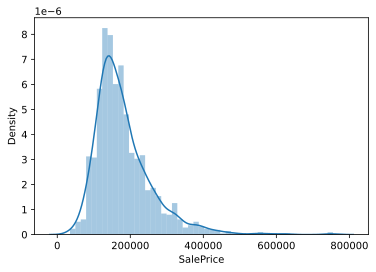

In [57]:
sns.distplot(train_data['SalePrice']);
print("Skewness coeff. is: %f" % train_data['SalePrice'].skew())
print("Kurtosis coeff. is: %f" % train_data['SalePrice'].kurt())

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

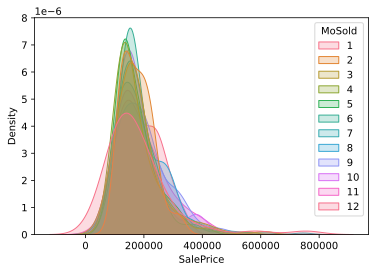

In [58]:
sns.kdeplot(data=train_data,x='SalePrice',hue="MoSold",fill=True,common_norm=False,palette="husl")

###### Corr with 'YearBuilt'

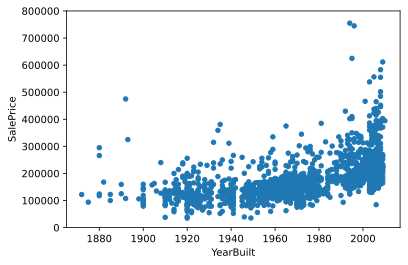

In [59]:
data_year_trend = pd.concat([train_data['SalePrice'], train_data['YearBuilt']], axis=1)
data_year_trend.plot.scatter(x='YearBuilt', y='SalePrice', ylim=(0,800000));

In [63]:
df_dummies = pd.get_dummies(df)

In [64]:
df_dummies.shape

(2919, 238)

In [65]:
df_dummies.isnull().sum()

LotArea                  0
OverallQual              0
YearBuilt                0
YearRemodAdd             0
MasVnrArea               0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 238, dtype: int64

###### One hotencoding

In [66]:
X_train = df_dummies[df_dummies.is_test == 0].drop('is_test', axis = 1)
X_test = df_dummies[df_dummies.is_test == 1].drop('is_test', axis = 1)

In [67]:
columns = X_train.columns

In [68]:
columns

Index(['LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=237)

In [69]:
X_train

,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,7,2003,2003,196.0,706.0,150.0,856.0,856,854,...,0,0,0,1,0,0,0,0,1,0
1,9600,6,1976,1976,0.0,978.0,284.0,1262.0,1262,0,...,0,0,0,1,0,0,0,0,1,0
2,11250,7,2001,2002,162.0,486.0,434.0,920.0,920,866,...,0,0,0,1,0,0,0,0,1,0
3,9550,7,1915,1970,0.0,216.0,540.0,756.0,961,756,...,0,0,0,1,1,0,0,0,0,0
4,14260,8,2000,2000,350.0,655.0,490.0,1145.0,1145,1053,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,1999,2000,0.0,0.0,953.0,953.0,953,694,...,0,0,0,1,0,0,0,0,1,0
1456,13175,6,1978,1988,119.0,790.0,589.0,1542.0,2073,0,...,0,0,0,1,0,0,0,0,1,0
1457,9042,7,1941,2006,0.0,275.0,877.0,1152.0,1188,1152,...,0,0,0,1,0,0,0,0,1,0
1458,9717,5,1950,1996,0.0,49.0,0.0,1078.0,1078,0,...,0,0,0,1,0,0,0,0,1,0


###### Skaling

In [70]:
scaler = StandardScaler()

In [71]:
scaler.fit(X_train)

StandardScaler()

In [72]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=columns)

In [73]:
X_test_scaled = scaler.transform(X_test)

In [74]:
X_train_scaled

,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.207142,0.651479,1.050994,0.878668,0.511463,0.575425,-0.944591,-0.459303,-0.793434,1.161852,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1,-0.091886,-0.071836,0.156734,-0.429577,-0.574365,1.171992,-0.641228,0.466465,0.257140,-0.795163,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
2,0.073480,0.651479,0.984752,0.830215,0.323105,0.092907,-0.301643,-0.313369,-0.627826,1.189351,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
3,-0.096897,0.651479,-1.863632,-0.720298,-0.574365,-0.499274,-0.061670,-0.687324,-0.521734,0.937276,...,-0.058621,-0.301962,-0.045376,0.390293,3.668167,-0.052414,-0.091035,-0.117851,-2.138345,-0.305995
4,0.375148,1.374795,0.951632,0.733308,1.364614,0.463568,-0.174865,0.199680,-0.045611,1.617877,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.260560,-0.071836,0.918511,0.733308,-0.574365,-0.973018,0.873321,-0.238122,-0.542435,0.795198,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1456,0.266407,-0.071836,0.222975,0.151865,0.084888,0.759659,0.049262,1.104925,2.355701,-0.795163,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1457,-0.147810,0.651479,-1.002492,1.024029,-0.574365,-0.369871,0.701265,0.215641,0.065656,1.844744,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1458,-0.080160,-0.795151,-0.704406,0.539493,-0.574365,-0.865548,-1.284176,0.046905,-0.218982,-0.795163,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


In [75]:
y_train

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [76]:
Y_train=np.asarray(y_train)

In [77]:
Y_train

array([208500, 181500, 223500, ..., 266500, 142125, 147500], dtype=int64)

In [78]:
X_test_scaled.shape

(1459, 237)

In [79]:
regression = LinearRegression()

In [80]:
regression.fit(X_train, y_train)

LinearRegression()

In [81]:
y_pred = regression.predict(X_test)

In [82]:
y_pred

array([106169.61086154, 160143.52644365, 186324.97706547, ...,
       165263.36551763, 102715.73193617, 221304.90429698])

In [83]:
["{:10} {:.3f}".format(x, y) for y, x in sorted(zip(regression.coef_,X_train_scaled.columns))]

['RoofMatl_ClyTile -584834.083',
 'Condition2_PosN -191362.783',
 'Condition2_RRAe -84538.331',
 'Electrical_Mix -43541.277',
 'Functional_Sev -41918.621',
 'Exterior1st_ImStucc -41181.049',
 'LandSlope_Sev -27681.787',
 'Heating_OthW -26667.138',
 'MSZoning_C (all) -26140.330',
 'Foundation_Wood -23593.940',
 'Exterior2nd_Stone -21919.404',
 'Neighborhood_Mitchel -19925.674',
 'Condition1_RRAe -19101.736',
 'RoofStyle_Gable -18490.020',
 'BsmtCond_Fa -17454.813',
 'RoofStyle_Hip -17443.897',
 'RoofStyle_Flat -16682.459',
 'ExterCond_Po -16188.654',
 'Neighborhood_Edwards -15522.207',
 'Street_Grvl -15504.171',
 'RoofStyle_Gambrel -14555.841',
 'Exterior2nd_Other -14137.793',
 'Neighborhood_NWAmes -13580.700',
 'HouseStyle_2.5Fin -12377.766',
 'LandContour_Low -12297.611',
 'Neighborhood_NAmes -12203.450',
 'Neighborhood_ClearCr -11949.474',
 'BsmtCond_Gd -11734.444',
 'HouseStyle_2.5Unf -11551.124',
 'Neighborhood_OldTown -11375.046',
 'BsmtCond_TA -9675.558',
 'Neighborhood_Gilbert -

In [84]:
y_test_verification = pd.read_csv ('sample_submission.csv')

In [85]:
y_test_verification['SalePrice']

0       169277.052498
1       187758.393989
2       183583.683570
3       179317.477511
4       150730.079977
            ...      
1454    167081.220949
1455    164788.778231
1456    219222.423400
1457    184924.279659
1458    187741.866657
Name: SalePrice, Length: 1459, dtype: float64

######  Quality metrics

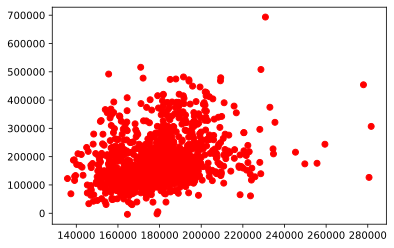

In [86]:
plt.plot(y_test_verification['SalePrice'], y_pred, 'ro')

(array([  1.,   0.,   0.,   2.,   1.,   7.,   5.,  17.,  31.,  29.,  44.,
         56., 121., 166., 262., 376., 261.,  63.,  11.,   6.]),
 array([-462571.79991073, -430389.31133279, -398206.82275484,
        -366024.3341769 , -333841.84559896, -301659.35702102,
        -269476.86844307, -237294.37986513, -205111.89128719,
        -172929.40270925, -140746.9141313 , -108564.42555336,
         -76381.93697542,  -44199.44839748,  -12016.95981953,
          20165.52875841,   52348.01733635,   84530.50591429,
         116712.99449224,  148895.48307018,  181077.97164812]),
 <BarContainer object of 20 artists>)

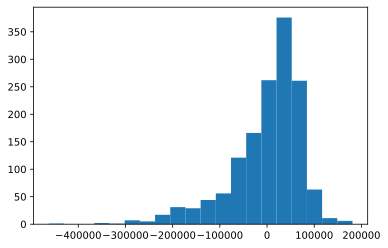

In [87]:
plt.hist(y_test_verification['SalePrice'] - y_pred, bins=20)

In [88]:
mse = np.mean((np.log(y_test_verification['SalePrice'])-np.log(y_pred))**2)
print('mse', mse)
print('sqrt(mse)', mse**0.5)
print('avg_error', np.mean(abs(np.log(y_test_verification['SalePrice'])-(np.log(y_pred)))))

mse 0.17691890191271573
sqrt(mse) 0.42061728674974325
avg_error 0.32595922288806795


<ipython-input-88-d3ce8883fff8>:1: RuntimeWarning: invalid value encountered in log
  mse = np.mean((np.log(y_test_verification['SalePrice'])-np.log(y_pred))**2)
<ipython-input-88-d3ce8883fff8>:4: RuntimeWarning: invalid value encountered in log
  print('avg_error', np.mean(abs(np.log(y_test_verification['SalePrice'])-(np.log(y_pred)))))
